# Modeling and Data Preparation

Here in this notebook I will be working on cleaning the data based off of the EDA, and preparing it to be used in the modeling portion of the project.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set the working directory to the specified folder
os.chdir(r'C:\Users\alala\git\Personal Projects\bmw_price_predictions')

# Load the dataset
file_path = 'data/bmw_pricing_challenge.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

  maker_key model_key  mileage  engine_power registration_date    fuel  \
0       BMW       118   140411           100        2012-02-01  diesel   
1       BMW        M4    13929           317        2016-04-01  petrol   
2       BMW       320   183297           120        2012-04-01  diesel   
3       BMW       420   128035           135        2014-07-01  diesel   
4       BMW       425    97097           160        2014-12-01  diesel   

  paint_color     car_type  feature_1  feature_2  feature_3  feature_4  \
0       black  convertible       True       True      False      False   
1        grey  convertible       True       True      False      False   
2       white  convertible      False      False      False      False   
3         red  convertible       True       True      False      False   
4      silver  convertible       True       True      False      False   

   feature_5  feature_6  feature_7  feature_8  price     sold_at  
0       True       True       True      Fal

## Prepare the date based variables

In [2]:
# Convert 'registration_date' and 'sold_at' to datetime
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['sold_at'] = pd.to_datetime(df['sold_at'])

# Extract year and month from 'registration_date' and 'sold_at'
df['registration_year'] = df['registration_date'].dt.year
df['registration_month'] = df['registration_date'].dt.month
df['sold_year'] = df['sold_at'].dt.year
df['sold_month'] = df['sold_at'].dt.month

print(df.head())

  maker_key model_key  mileage  engine_power registration_date    fuel  \
0       BMW       118   140411           100        2012-02-01  diesel   
1       BMW        M4    13929           317        2016-04-01  petrol   
2       BMW       320   183297           120        2012-04-01  diesel   
3       BMW       420   128035           135        2014-07-01  diesel   
4       BMW       425    97097           160        2014-12-01  diesel   

  paint_color     car_type  feature_1  feature_2  ...  feature_5  feature_6  \
0       black  convertible       True       True  ...       True       True   
1        grey  convertible       True       True  ...      False       True   
2       white  convertible      False      False  ...       True      False   
3         red  convertible       True       True  ...       True       True   
4      silver  convertible       True       True  ...      False       True   

   feature_7  feature_8  price    sold_at  registration_year  \
0       True    

# Bin model types

In [3]:
# Function to categorize models
def categorize_model(model):
    entry_level = ['114', '116', '118', '120', '123', '125', '135', '216', '218', '220', '225', 'X1', 'X2', 'i3', 'Z4']
    middle_level = ['316', '318', '320', '325', '328', '330', '335', '418', '420', '425', '430', '435', '518', '520', '523', '525', '528', '530', '535', 'X3', 'X4', 'i4', 'i5']
    high_end = ['630', '635', '640', '650', '730', '735', '740', '750', '8', 'X5', 'X6', 'X7', 'M135', 'M235', 'M3', 'M4', 'M5', 'M550', 'i7', 'i8']
    
    if any(model.startswith(prefix) for prefix in entry_level):
        return 'entry level'
    elif any(model.startswith(prefix) for prefix in middle_level):
        return 'middle level'
    elif any(model.startswith(prefix) for prefix in high_end):
        return 'high end'
    else:
        return 'middle level'  # Default to middle level if not found

# Apply categorization
df['category'] = df['model_key'].apply(categorize_model)

# Display the first few rows of the dataframe to verify changes
print(df.head())


  maker_key model_key  mileage  engine_power registration_date    fuel  \
0       BMW       118   140411           100        2012-02-01  diesel   
1       BMW        M4    13929           317        2016-04-01  petrol   
2       BMW       320   183297           120        2012-04-01  diesel   
3       BMW       420   128035           135        2014-07-01  diesel   
4       BMW       425    97097           160        2014-12-01  diesel   

  paint_color     car_type  feature_1  feature_2  ...  feature_6  feature_7  \
0       black  convertible       True       True  ...       True       True   
1        grey  convertible       True       True  ...       True       True   
2       white  convertible      False      False  ...      False       True   
3         red  convertible       True       True  ...       True       True   
4      silver  convertible       True       True  ...       True       True   

   feature_8  price    sold_at  registration_year  registration_month  \
0      

# Encoding Variables (Categorical)

In [4]:
# Encode 'maker_key' and 'model_key' with Label Encoding
label_encoder = LabelEncoder()
df['maker_key'] = label_encoder.fit_transform(df['maker_key'])
df['model_key'] = label_encoder.fit_transform(df['model_key'])

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['fuel', 'paint_color', 'car_type', 'category'], drop_first=True)

# Handle missing values
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Define the target variable and features
X = df_encoded.drop(columns=['price', 'registration_date', 'sold_at'])
y = df_encoded['price']

# Check for non-numeric columns to ensure all are numeric now
print(X.dtypes)

maker_key                int32
model_key                int32
mileage                  int64
engine_power             int64
feature_1                 bool
feature_2                 bool
feature_3                 bool
feature_4                 bool
feature_5                 bool
feature_6                 bool
feature_7                 bool
feature_8                 bool
registration_year        int32
registration_month       int32
sold_year                int32
sold_month               int32
fuel_electro              bool
fuel_hybrid_petrol        bool
fuel_petrol               bool
paint_color_black         bool
paint_color_blue          bool
paint_color_brown         bool
paint_color_green         bool
paint_color_grey          bool
paint_color_orange        bool
paint_color_red           bool
paint_color_silver        bool
paint_color_white         bool
car_type_coupe            bool
car_type_estate           bool
car_type_hatchback        bool
car_type_sedan            bool
car_type

In [5]:
# Check for missing values
print(df_encoded.isnull().sum())


maker_key                0
model_key                0
mileage                  0
engine_power             0
registration_date        0
feature_1                0
feature_2                0
feature_3                0
feature_4                0
feature_5                0
feature_6                0
feature_7                0
feature_8                0
price                    0
sold_at                  0
registration_year        0
registration_month       0
sold_year                0
sold_month               0
fuel_electro             0
fuel_hybrid_petrol       0
fuel_petrol              0
paint_color_black        0
paint_color_blue         0
paint_color_brown        0
paint_color_green        0
paint_color_grey         0
paint_color_orange       0
paint_color_red          0
paint_color_silver       0
paint_color_white        0
car_type_coupe           0
car_type_estate          0
car_type_hatchback       0
car_type_sedan           0
car_type_subcompact      0
car_type_suv             0
c

# Split Data

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling and Fitting (Base Model OLS)

In [7]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {cv_scores.mean()}")


Cross-validation R^2 scores: [0.78588578 0.48147229 0.77876135 0.79982814 0.78920865]
Mean cross-validation R^2 score: 0.7270312419215551


# Generate Predictions and Assess

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 16438949.518264689
R^2 Score: 0.7686956760656128


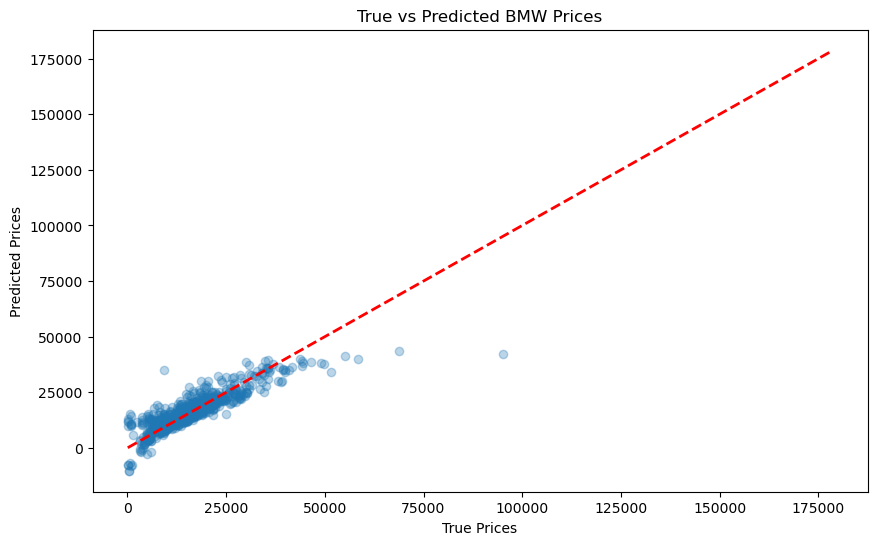

In [10]:
# Plot the true vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted BMW Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

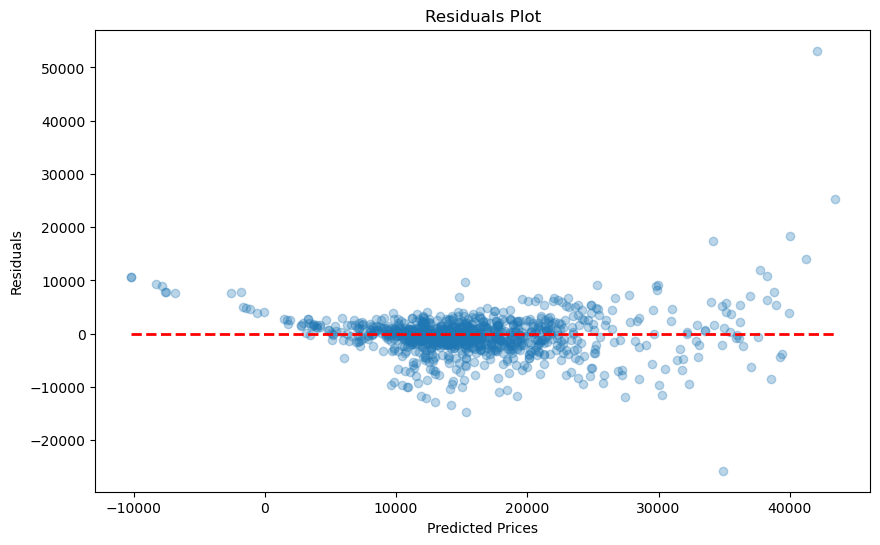

In [11]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Testing Other Models

Here I will now be implementing a number of other models, to compare which performs best.

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

#List of models I will be trying
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

In [13]:
# Evaluate each model using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} Cross-validation R^2 scores: {cv_scores}")
    print(f"{name} Mean cross-validation R^2 score: {cv_scores.mean()}")


Ridge Cross-validation R^2 scores: [0.78560387 0.48137101 0.77850282 0.80188348 0.7898075 ]
Ridge Mean cross-validation R^2 score: 0.7274337356106015
Lasso Cross-validation R^2 scores: [0.78570108 0.4813681  0.77873292 0.80138251 0.78980768]
Lasso Mean cross-validation R^2 score: 0.7273984586423421
ElasticNet Cross-validation R^2 scores: [0.72602159 0.45465091 0.72888035 0.77080862 0.72347251]
ElasticNet Mean cross-validation R^2 score: 0.6807667972432206
Decision Tree Cross-validation R^2 scores: [0.7762068  0.49254394 0.78370224 0.33397642 0.26885726]
Decision Tree Mean cross-validation R^2 score: 0.5310573317280887
Random Forest Cross-validation R^2 scores: [0.8765408  0.55807524 0.87741955 0.88541753 0.85250937]
Random Forest Mean cross-validation R^2 score: 0.8099924970359828
Gradient Boosting Cross-validation R^2 scores: [0.87487983 0.54703612 0.87299717 0.86751355 0.87896876]
Gradient Boosting Mean cross-validation R^2 score: 0.8082790879731132
SVR Cross-validation R^2 scores: [

In [14]:
# Fit the best model GRAD BOOSTING
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest R^2 Score: {r2}")

Random Forest Mean Squared Error: 11319878.749893866
Random Forest R^2 Score: 0.8407235876991834


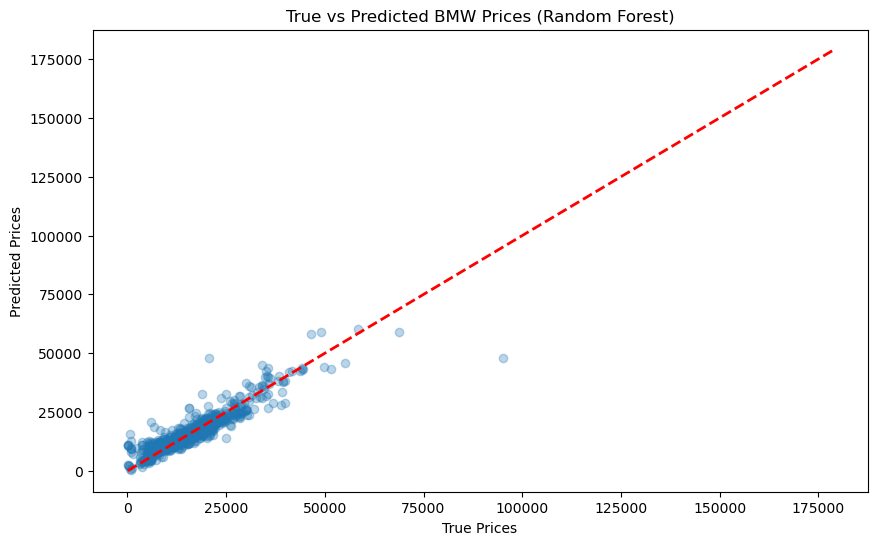

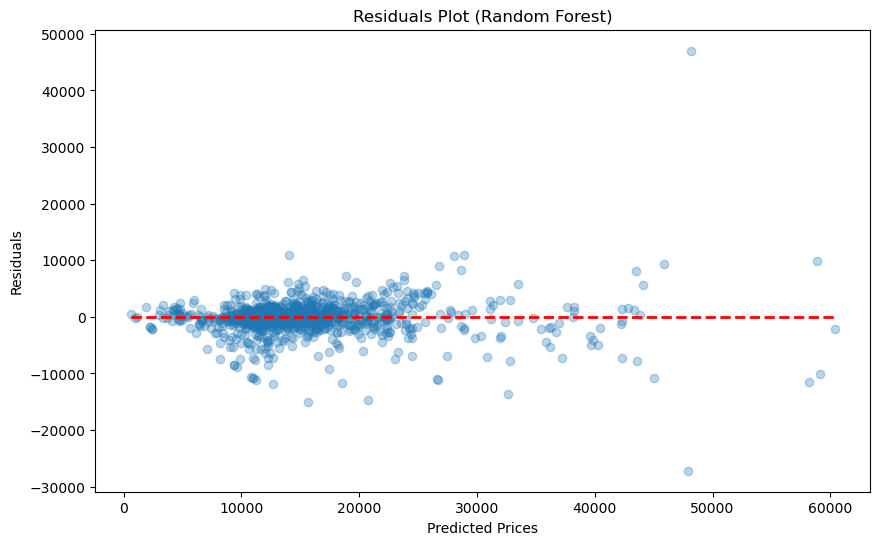

In [15]:
# Plot the true vs predicted prices for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted BMW Prices (Random Forest)')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Plot residuals for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Further Eval Best Models 

Here I will further evaluate the best performing models from earlier, we will explore some more metrics related to performance

In [16]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {evs}")
    print("\n")

In [17]:
# Evaluate the best models
best_models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

for name, model in best_models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)

Model: RandomForestRegressor
Mean Squared Error: 10887701.60371517
Mean Absolute Error: 1987.5954592363262
Root Mean Squared Error: 3299.651739762118
R^2 Score: 0.8468045384622288
Explained Variance Score: 0.8471279745701191


Model: GradientBoostingRegressor
Mean Squared Error: 11372495.90852355
Mean Absolute Error: 1974.2722429774321
Root Mean Squared Error: 3372.3131391559045
R^2 Score: 0.8399832376974594
Explained Variance Score: 0.8406235591106033


Model: XGBRegressor
Mean Squared Error: 14171913.365729911
Mean Absolute Error: 2161.599580526598
Root Mean Squared Error: 3764.5601822430613
R^2 Score: 0.8005940199357158
Explained Variance Score: 0.8008732655750807




# Try Further Feature Engineering (Transform Response on Grad Boost)

Here I will see if transforming the target variable will help the performance of the model, and possibly fix the clustering of the residual values.

In [18]:
# Apply log transformation to the target variable
y_log = np.log1p(y)  # log1p is used to handle zero values in price

# Split the data into training and testing sets with the transformed target variable
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Evaluate the Gradient Boosting model with log-transformed target variable
model = GradientBoostingRegressor()
model.fit(X_train_log, y_train_log)
y_pred_log = model.predict(X_test_log)

# Convert predictions back to the original scale
y_pred_original_scale = np.expm1(y_pred_log)  # expm1 reverses the log1p transformation

# Evaluate the model
mse = mean_squared_error(np.expm1(y_test_log), y_pred_original_scale)
mae = mean_absolute_error(np.expm1(y_test_log), y_pred_original_scale)
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test_log), y_pred_original_scale)
evs = explained_variance_score(np.expm1(y_test_log), y_pred_original_scale)

In [19]:
print("Gradient Boosting with Log Transformation")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
print(f"Explained Variance Score: {evs}")

Gradient Boosting with Log Transformation
Mean Squared Error: 10834047.415168932
Mean Absolute Error: 1966.482490345186
Root Mean Squared Error: 3291.511418052341
R^2 Score: 0.8475594799987393
Explained Variance Score: 0.8491090888540034


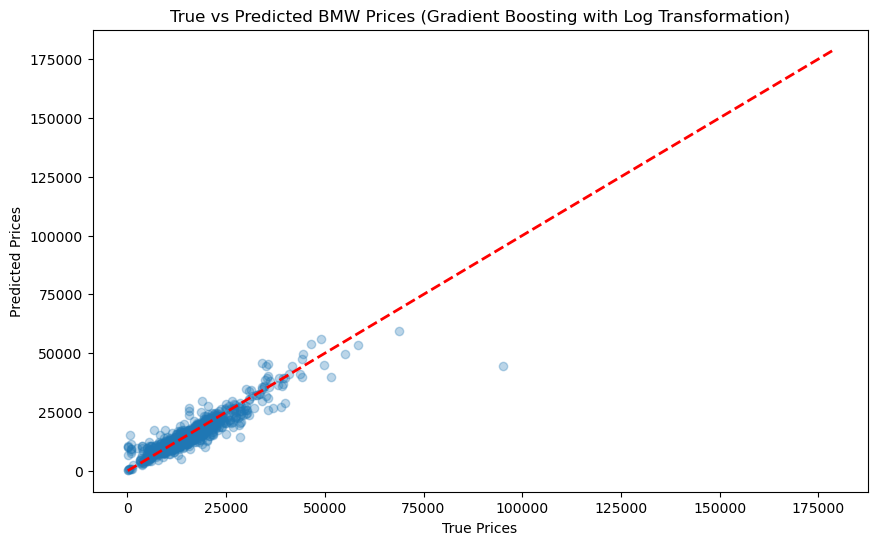

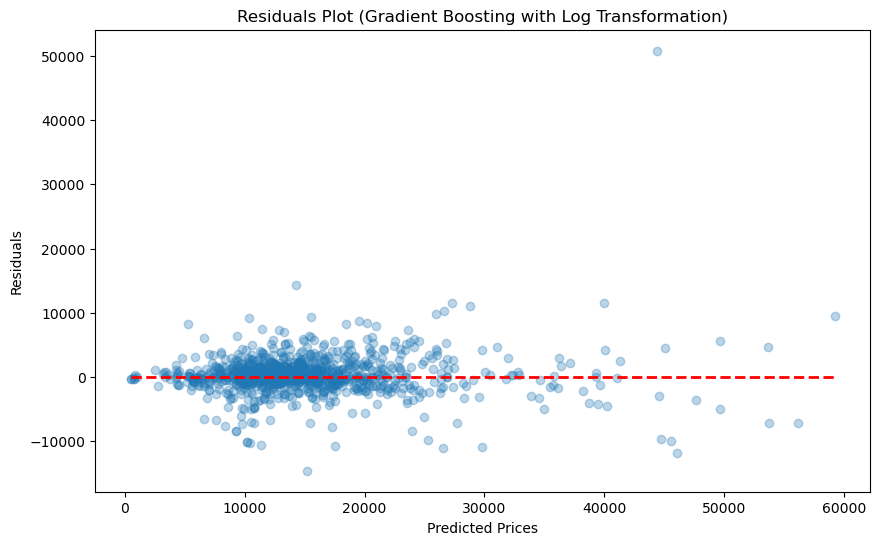

In [20]:
# Plot the true vs predicted prices for the log-transformed model
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test_log), y_pred_original_scale, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted BMW Prices (Gradient Boosting with Log Transformation)')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Plot residuals for the log-transformed model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original_scale, np.expm1(y_test_log) - y_pred_original_scale, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_original_scale.min(), xmax=y_pred_original_scale.max(), color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot (Gradient Boosting with Log Transformation)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Compare Best Models using Log-Trans Data

Here I will now trying the transformed target variable with all the best performing models from before.

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Define a function to evaluate models with log transformation
def evaluate_model_log(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    
    # Convert predictions back to the original scale
    y_pred_original_scale = np.expm1(y_pred_log)  # expm1 reverses the log1p transformation

    mse = mean_squared_error(np.expm1(y_test), y_pred_original_scale)
    mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
    rmse = np.sqrt(mse)
    r2 = r2_score(np.expm1(y_test), y_pred_original_scale)
    evs = explained_variance_score(np.expm1(y_test), y_pred_original_scale)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {evs}")
    print("\n")

In [22]:
# Evaluate the best models with log transformation
best_models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

for name, model in best_models.items():
    evaluate_model_log(model, X_train_log, y_train_log, X_test_log, y_test_log)


Model: RandomForestRegressor
Mean Squared Error: 11825098.811165268
Mean Absolute Error: 2121.2719202412177
Root Mean Squared Error: 3438.7641400894695
R^2 Score: 0.8336148862228128
Explained Variance Score: 0.8372616998741376


Model: GradientBoostingRegressor
Mean Squared Error: 10841043.466314275
Mean Absolute Error: 1969.026788267493
Root Mean Squared Error: 3292.573987978748
R^2 Score: 0.8474610420250362
Explained Variance Score: 0.8489803259322808


Model: XGBRegressor
Mean Squared Error: 13700174.80563227
Mean Absolute Error: 2225.1533764975975
Root Mean Squared Error: 3701.3747183488827
R^2 Score: 0.8072316197772345
Explained Variance Score: 0.8081518563443748




# Trying Feat Engineering (Polynomial Features)

Here I will be trying to generate polynomial features and look at how they perform.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)

# Define a function to evaluate models with polynomial features
def evaluate_model_poly(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {evs}")
    print("\n")

In [24]:
# Evaluate the best models with polynomial features
for name, model in best_models.items():
    evaluate_model_poly(model, X_train_poly, y_train_poly, X_test_poly, y_test_poly)


Model: RandomForestRegressor
Mean Squared Error: 10216261.370485036
Mean Absolute Error: 1919.4200206398348
Root Mean Squared Error: 3196.288686975104
R^2 Score: 0.8562520417249578
Explained Variance Score: 0.8565307505817146


Model: GradientBoostingRegressor
Mean Squared Error: 10014951.394800594
Mean Absolute Error: 1972.9504188517674
Root Mean Squared Error: 3164.6408002805933
R^2 Score: 0.8590845747755158
Explained Variance Score: 0.8593140596963537


Model: XGBRegressor
Mean Squared Error: 16893059.123710815
Mean Absolute Error: 2176.881858014716
Root Mean Squared Error: 4110.1166800604105
R^2 Score: 0.7623061245213901
Explained Variance Score: 0.7628023525511551




# Combining and Comparing Code for Log-Trans and Polynomial Features

Here I will combine the approach of polynomial features and the log transformed data.

In [25]:
# Generate polynomial features for log-transformed target
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features data with log-transformed target variable into training and testing sets
X_train_poly_log, X_test_poly_log, y_train_poly_log, y_test_poly_log = train_test_split(
    X_poly, y_log, test_size=0.2, random_state=42)

# Evaluate the best models with polynomial features and log transformation
for name, model in best_models.items():
    evaluate_model_log(
        model, X_train_poly_log, y_train_poly_log, X_test_poly_log, y_test_poly_log)


Model: RandomForestRegressor
Mean Squared Error: 10293388.523205176
Mean Absolute Error: 1990.5324536030914
Root Mean Squared Error: 3208.33111184073
R^2 Score: 0.8551668237250427
Explained Variance Score: 0.8582008958959266


Model: GradientBoostingRegressor
Mean Squared Error: 11937381.444095
Mean Absolute Error: 2084.2156635763276
Root Mean Squared Error: 3455.0515834202824
R^2 Score: 0.8320350128573931
Explained Variance Score: 0.8342905949932541


Model: XGBRegressor
Mean Squared Error: 16586024.720189933
Mean Absolute Error: 2300.4456011414895
Root Mean Squared Error: 4072.5943476106154
R^2 Score: 0.766626253678797
Explained Variance Score: 0.7674512101381219




# Results and Performance

After testing various models and feature engineering approaches such as transformations and creating polynomial features, I can see that the best performing models and techniques were:

**Random Forest Regressor with Polynomial Features:** This combination provided the best performance, with the lowest MSE, MAE, RMSE, and highest $R^{2}$ and explained variance scores.

It is also forth to mention:

**Gradient Boosting Regressor with Log Transformation:** This also performed well, especially with the log transformation applied. The $R^{2}$ and explained variance scores were slightly higher than those of Random Forest with polynomial features.

## Tuning the Random Forest Model

It could be useful to now do some **hyperparameter tuning** for the Random forest model as it is the best performing one and we could dpossibly yield even better results.

In [26]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train_poly, y_train_poly)

# # Print the best parameters and score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)


### THIS TOOK TOO LONG AND A LOT OF RESOURCES 

# SAVE MODEL + Preprocessing Steps

## I will save the model label encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming `label_encoder` was used for encoding 'maker_key' and 'model_key'
label_encoder = LabelEncoder()
df['maker_key'] = label_encoder.fit_transform(df['maker_key'])
df['model_key'] = label_encoder.fit_transform(df['model_key'])

# Save the label encoder
joblib.dump(label_encoder, 'source/label_encoder.pkl')


['source/label_encoder.pkl']

## Save Polynomial Feature Generator

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Save the polynomial features generator
joblib.dump(poly, 'source/poly_features.pkl')


['source/poly_features.pkl']

## Save Trained Model

In [31]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor()
best_model.fit(X_train_poly_log, y_train_poly_log)

# Save the trained model
joblib.dump(best_model, 'source/best_random_forest_model.pkl')


['source/best_random_forest_model.pkl']